# Support Vector Machines

### Stage 1: Foundations – Understanding Hyperplanes & Decision Boundaries 🚀

Before diving into SVMs, we need to understand hyperplanes and how they separate data.

#### 📌 1.1 What is a Hyperplane?

A hyperplane is a generalization of a line in higher dimensions.

* In 2D space, a hyperplane is a line that divides the plane into two halves.

* In 3D space, a hyperplane is a plane that divides space into two regions.

* In higher dimensions (p-dimensional space), a hyperplane is a (p−1)-dimensional flat subspace that divides the space into two halves.

### 🧑‍🏫 Equation of a Hyperplane

A hyperplane in p-dimensional space is defined by:

β₀ + β₁X₁ + β₂X₂ + ⋯ + βₚXₚ = 0

This means:
- Every point (X₁, X₂, …, Xₚ) that satisfies this equation lies on the hyperplane.

If:

β₀ + β₁X₁ + β₂X₂ + ⋯ + βₚXₚ > 0

then the point is on one side of the hyperplane.

β₀ + β₁X₁ + β₂X₂ + ⋯ + βₚXₚ < 0

then the point is on the other side of the hyperplane.

#### 🔹 Intuition
The hyperplane splits the space into two regions. We can use this idea to classify data!

### 🖼️ 1.2 Visualizing Hyperplanes (2D & 3D)

Now, let’s visualize hyperplanes in 2D and 3D using Python.

🔹 Step 1: Hyperplane in 2D (A Line)
We will generate some random points and plot a line separating them.

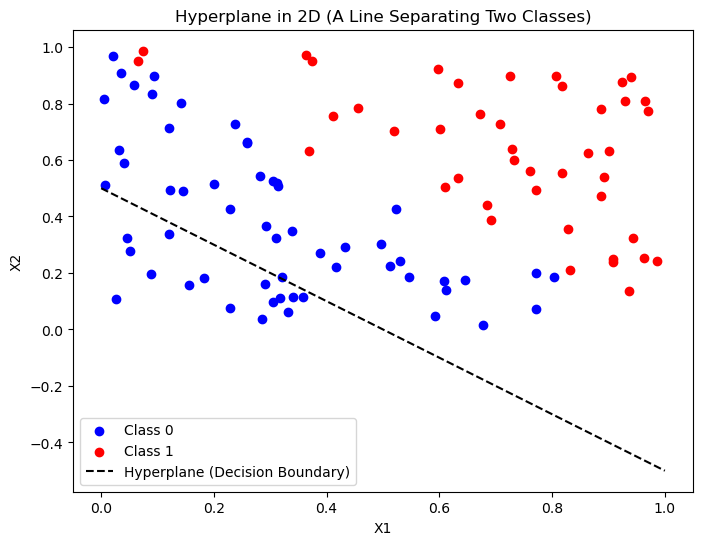

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space
labels = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple linear boundary

# Equation of a hyperplane (line): w0 + w1*x + w2*y = 0
w0, w1, w2 = -0.5, 1, 1  # Example hyperplane equation: x + y - 0.5 = 0

# Generate x values and compute corresponding y values for the hyperplane
x_vals = np.linspace(0, 1, 100)
y_vals = (-w0 - w1 * x_vals) / w2  # Rearranging the equation

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], color='red', label="Class 1")

# Plot the separating hyperplane (decision boundary)
plt.plot(x_vals, y_vals, 'k--', label="Hyperplane (Decision Boundary)")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Hyperplane in 2D (A Line Separating Two Classes)")
plt.show()


#### What’s Happening?

The black dashed line represents the hyperplane (decision boundary).

It separates the two classes (blue and red points).

The equation of this hyperplane is X₁ + X₂ = 0.5.

### Step 2: Hyperplane in 3D (A Plane)

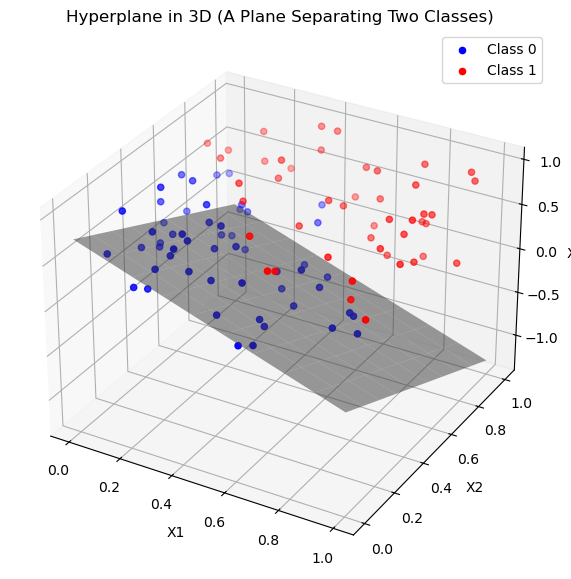

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random 3D points
np.random.seed(42)
X3D = np.random.rand(100, 3)  # 100 points in 3D space
labels3D = (X3D[:, 0] + X3D[:, 1] + X3D[:, 2] > 1.5).astype(int)

# Equation of a hyperplane (plane): w0 + w1*x + w2*y + w3*z = 0
w0, w1, w2, w3 = -0.75, 1, 1, 1  # Example plane equation: x + y + z - 0.75 = 0

# Generate meshgrid for the hyperplane
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = (-w0 - w1 * xx - w2 * yy) / w3  # Rearranging the equation

# Plot the 3D scatter and hyperplane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X3D[labels3D == 0][:, 0], X3D[labels3D == 0][:, 1], X3D[labels3D == 0][:, 2], color='blue', label="Class 0")
ax.scatter(X3D[labels3D == 1][:, 0], X3D[labels3D == 1][:, 1], X3D[labels3D == 1][:, 2], color='red', label="Class 1")

# Plot the separating hyperplane (decision boundary)
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("Hyperplane in 3D (A Plane Separating Two Classes)")
plt.legend()
plt.show()


#### What’s Happening?

The gray plane represents the hyperplane in 3D.

It separates the red and blue classes in 3D space.

The equation is X₁ + X₂ + X₃ = 0.75.

#### 1.3 Key Takeaways

✅ A hyperplane is a generalization of a line in higher dimensions.

✅ It divides space into two parts, forming the basis of SVM classification.

✅ In 2D, the hyperplane is a line; in 3D, it’s a plane; in higher dimensions, it remains a p-1 dimensional subspace.

✅ If a point’s equation result is positive, it’s on one side of the hyperplane, and if it’s negative, it’s on the other side.


---

### 📌 2.1 What is the Maximal Margin Classifier?

The Maximal Margin Classifier (MMC) is the simplest form of SVM.

* It finds a hyperplane that perfectly separates two classes.

* Among all possible hyperplanes, it chooses the one that maximizes the distance (margin) from the nearest points.

* The nearest points that define this margin are called Support Vectors

### 🧐 2.2 Why Maximize the Margin?

* A larger margin makes the classifier more generalizable to new data.

* If the margin is too small, the model is too sensitive to small variations in data (overfitting).

* By maximizing the margin, MMC ensures robust classification.

Example: Imagine a tightrope walker balancing on a rope. The wider the rope (margin), the easier it is to walk safely (classification). A narrow rope makes falling (misclassification) more likely!

### 📏 2.3 Defining the Margin Mathematically

#### Support Vector Machine: Mathematical Formulation

Given a dataset of **n points** (x₁,y₁), (x₂,y₂), ..., (xₙ,yₙ), where:
* xᵢ represents the feature vector
* yᵢ represents the class label (+1 or -1)

A **hyperplane** is defined as:

β₀ + β₁X₁ + β₂X₂ + ⋯ + βₚXₚ = 0

For perfect classification, the **decision rule** is:

yᵢ(β₀ + β₁Xᵢ₁ + β₂Xᵢ₂ + ⋯ + βₚXᵢₚ) ≥ 1

* **If yᵢ = +1** → The point should be on one side of the margin
* **If yᵢ = -1** → The point should be on the other side of the margin

The **margin (M)** is given by:

M = 1/||β||

where ||β|| is the Euclidean norm of the weight vector β.

#### 🔹 Optimization Goal
Find **β** and β₀ that **maximize M** while keeping all points correctly classified.

### 🖼️ 2.4 Visualizing the Maximal Margin Classifier

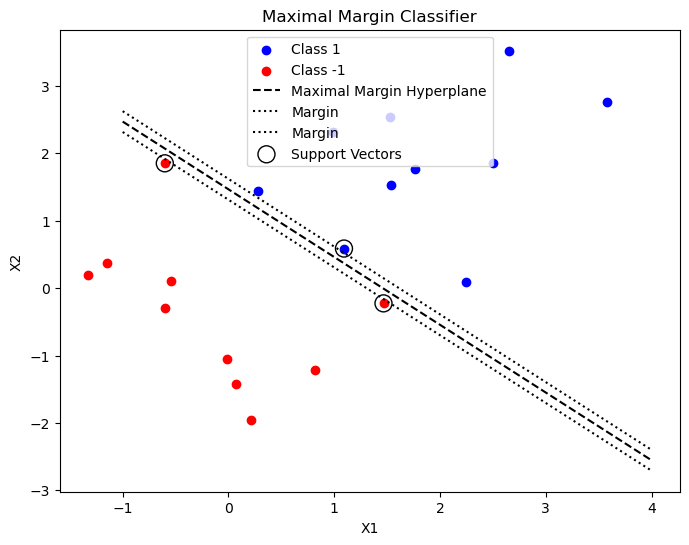

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate linearly separable data
np.random.seed(42)
X = np.random.randn(20, 2)
y = np.array([1] * 10 + [-1] * 10)  # Class labels

# Shift the two classes
X[y == 1] += 2

# Fit an SVM with a large C (to force MMC behavior)
svm = SVC(kernel="linear", C=1e5)
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
x_vals = np.linspace(-1, 4, 100)
y_vals = (-w[0] * x_vals - b) / w[1]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Class -1")

# Plot the hyperplane
plt.plot(x_vals, y_vals, 'k--', label="Maximal Margin Hyperplane")

# Plot the margin
margin = 1 / np.linalg.norm(w)
y_vals_margin_up = y_vals + margin
y_vals_margin_down = y_vals - margin
plt.plot(x_vals, y_vals_margin_up, 'k:', label="Margin")
plt.plot(x_vals, y_vals_margin_down, 'k:', label="Margin")

# Highlight the support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Maximal Margin Classifier")
plt.show()


##### 🚧 2.5 Limitations of Maximal Margin Classifier

✅ MMC works only if data is perfectly separable.\
❌ Real-world data is rarely separable.\
❌ Outliers can completely change the hyperplane.

🔹 Example: Imagine classifying cats vs. dogs based on height and weight. A single misclassified animal (e.g., a very large cat) could completely shift the decision boundary!

##### 🚀 Solution?

We introduce Soft Margin SVM (Support Vector Classifier - SVC), which allows some misclassification.

---

### 3.1: Soft Margin SVM (Support Vector Classifier - SVC) 🚀

Since Maximal Margin Classifier (MMC) only works when data is perfectly separable, we now introduce the Support Vector Classifier (SVC), which allows some misclassification for a more robust model.

##### Soft Margin SVM (SVC) allows misclassifications to balance flexibility and accuracy.

🔹 Analogy: Imagine you’re drawing a line in the sand to separate two groups of seashells. If a few shells are misplaced, should you force a strict line (MMC) or allow some shells to be on the “wrong” side for a better division?

#### Soft Margin SVM (SVC) allows misclassifications to balance flexibility and accuracy.

🔹 Analogy: Imagine you’re drawing a line in the sand to separate two groups of seashells. If a few shells are misplaced, should you force a strict line (MMC) or allow some shells to be on the “wrong” side for a better division?

### 📏 3.2 The Optimization Problem

The **Soft Margin SVM** modifies MMC by introducing **slack variables** ξᵢ, which allow some points to be **misclassified**.

#### New Constraints

For each point (xᵢ,yᵢ), instead of enforcing perfect separation:

yᵢ(β₀ + β₁Xᵢ₁ + β₂Xᵢ₂ + ⋯ + βₚXᵢₚ) ≥ 1

We relax the condition by allowing **some margin violations**:

yᵢ(β₀ + β₁Xᵢ₁ + β₂Xᵢ₂ + ⋯ + βₚXᵢₚ) ≥ 1 - ξᵢ

where ξᵢ ≥ 0 measures how much a point **violates** the margin.

#### 🎛️ 3.3 The Regularization Parameter C

The **C parameter** in SVM controls the trade-off between:
* **Large margin (low C)** → More misclassification allowed, better generalization
* **Strict classification (high C)** → Less misclassification, but may overfit

🔹 Intuition
Think of C as a budget for misclassification errors.

##### Mathematical Formulation

min(β,β₀,ξ) ½||β||² + C∑ᵢ₌₁ⁿξᵢ

##### Goal:
* **Minimize ||β||²** → Keep margin wide
* **Minimize ∑ξᵢ** → Keep violations low
* **C balances both objectives**

#### 🖼️ 3.4 Visualizing the Soft Margin SVM

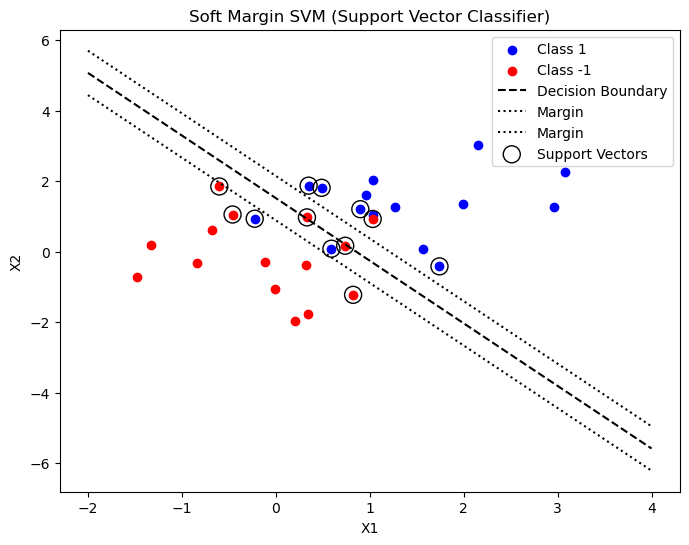

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate non-separable data
np.random.seed(42)
X = np.random.randn(30, 2)
y = np.array([1] * 15 + [-1] * 15)

# Introduce some overlap (non-separable case)
X[y == 1] += 1.5

# Train Soft Margin SVM with different C values
svm_soft = SVC(kernel="linear", C=1)  # Soft Margin
svm_soft.fit(X, y)

# Get the hyperplane
w = svm_soft.coef_[0]
b = svm_soft.intercept_[0]
x_vals = np.linspace(-2, 4, 100)
y_vals = (-w[0] * x_vals - b) / w[1]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Class -1")

# Plot the hyperplane
plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

# Plot the margin
margin = 1 / np.linalg.norm(w)
y_vals_margin_up = y_vals + margin
y_vals_margin_down = y_vals - margin
plt.plot(x_vals, y_vals_margin_up, 'k:', label="Margin")
plt.plot(x_vals, y_vals_margin_down, 'k:', label="Margin")

# Highlight the support vectors
support_vectors = svm_soft.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Soft Margin SVM (Support Vector Classifier)")
plt.show()


#### 🔍 3.5 Effect of Different C Values

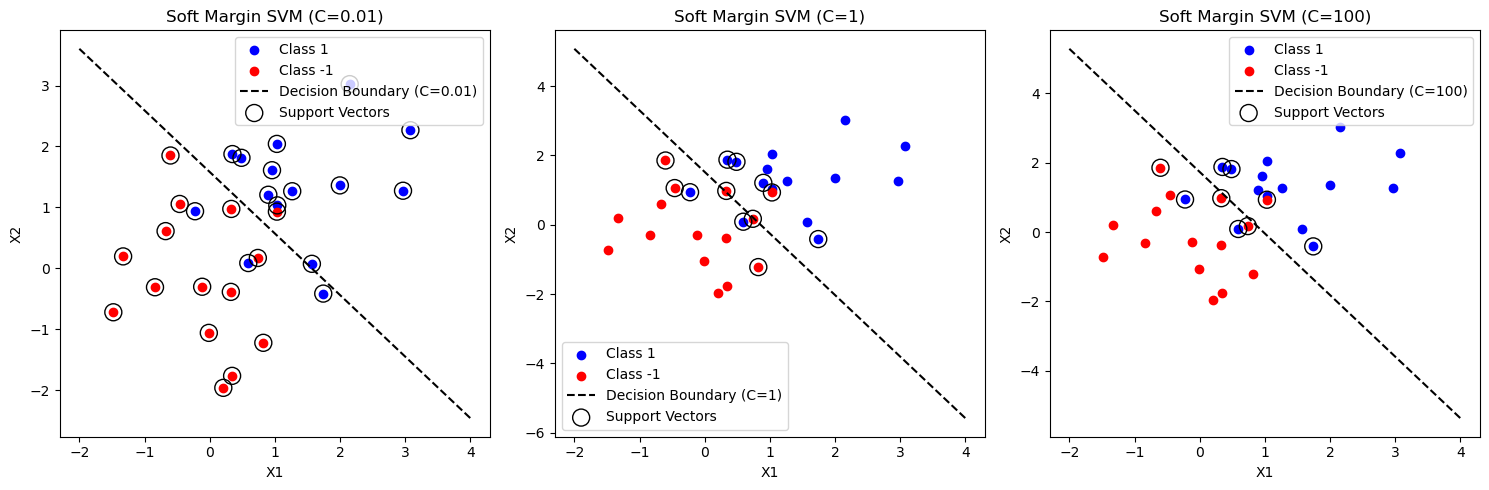

In [14]:
C_values = [0.01, 1, 100]
plt.figure(figsize=(15, 5))

for i, C in enumerate(C_values):
    svm_soft = SVC(kernel="linear", C=C)
    svm_soft.fit(X, y)

    # Get hyperplane
    w = svm_soft.coef_[0]
    b = svm_soft.intercept_[0]
    x_vals = np.linspace(-2, 4, 100)
    y_vals = (-w[0] * x_vals - b) / w[1]

    plt.subplot(1, 3, i + 1)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Class -1")
    plt.plot(x_vals, y_vals, 'k--', label=f"Decision Boundary (C={C})")

    # Support vectors
    support_vectors = svm_soft.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.title(f"Soft Margin SVM (C={C})")

plt.tight_layout()
plt.show()


#### Observations:

* C = 0.01 (loose margin) → Allows more misclassifications, wider margin.
* C = 1 (balanced) → Standard soft margin behavior.
* C = 100 (strict margin) → Fewer misclassifications, but overfits.

---

### 4.1: Non-Linear Classification with the Kernel Trick 🚀

#### 📌 4.1 Why Do We Need Kernels?

* Linear SVMs can only classify data that is linearly separable.
* But real-world data is rarely linearly separable!
* Solution: Map the data into a higher-dimensional space where it becomes linearly separable.

🔹 Example: Imagine separating red and blue points arranged in a circle. A straight line won’t work, but if we map the data into a higher dimension, we can separate it using a plane.

### 🧠 4.2 The Kernel Trick

Instead of explicitly transforming data to **higher dimensions**, we use a **kernel function** to compute the separation **efficiently**.

#### 🔹 Key Concept
**Kernel function K(x,x′)** computes the similarity between two points **without explicitly transforming them** into higher dimensions.

#### Types of Kernels

| Kernel Type | Formula | When to Use? |
|------------|---------|--------------|
| **Linear** | K(x,x′) = x⋅x′ | Data is **already** linearly separable |
| **Polynomial** | K(x,x′) = (x⋅x′ + c)ᵈ | Data has **curved** boundaries |
| **Radial Basis Function (RBF)** | K(x,x′) = exp(-γ||x-x′||²) | Complex, non-linear boundaries |
| **Sigmoid** | K(x,x′) = tanh(βx⋅x′ + c) | Similar to neural networks |

### 🎨 4.3 Visualizing the Need for Non-Linear SVM

Let’s generate non-linearly separable data and see why a linear SVM fails.

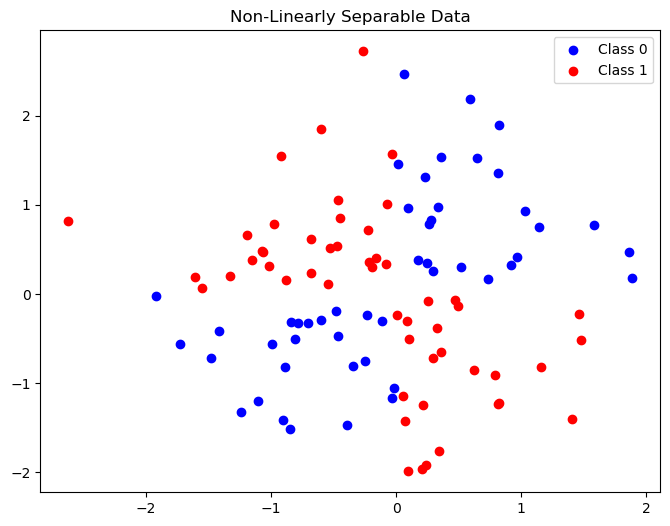

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate non-linearly separable data (circle pattern)
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)  # XOR pattern

# Train a Linear SVM
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X, y)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 1")
plt.title("Non-Linearly Separable Data")
plt.legend()
plt.show()


#### 🔧 4.4 Applying the Kernel Trick (Polynomial & RBF Kernels)

In [22]:
# !pip install mlxtend

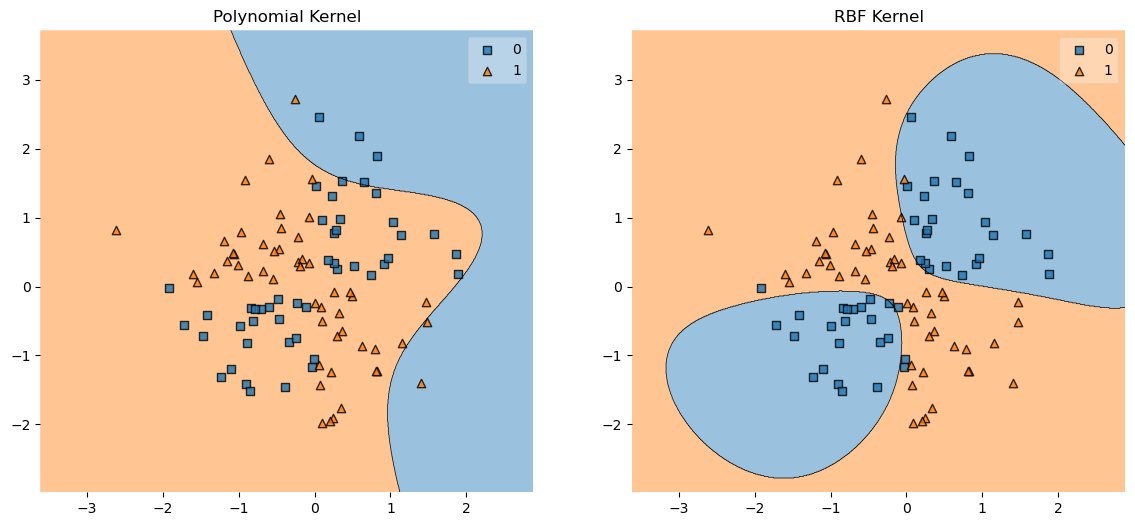

In [23]:
from mlxtend.plotting import plot_decision_regions

# Train SVMs with different kernels
svm_poly = SVC(kernel="poly", degree=3, C=1)  # Polynomial Kernel
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=1)   # RBF Kernel

svm_poly.fit(X, y)
svm_rbf.fit(X, y)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, model, title in zip(axes, [svm_poly, svm_rbf], ["Polynomial Kernel", "RBF Kernel"]):
    plot_decision_regions(X, y, clf=model, ax=ax)
    ax.set_title(title)

plt.show()


#### 🛠 4.5 How Does RBF Kernel Work?

The **RBF (Radial Basis Function) kernel** is the most commonly used.

K(x,x′) = exp(-γ||x-x′||²)

##### 🔹 How does it work?
* **Points that are close** → High kernel value → Similar class
* **Points that are far** → Low kernel value → Different class
* **γ** controls the influence of a single training point

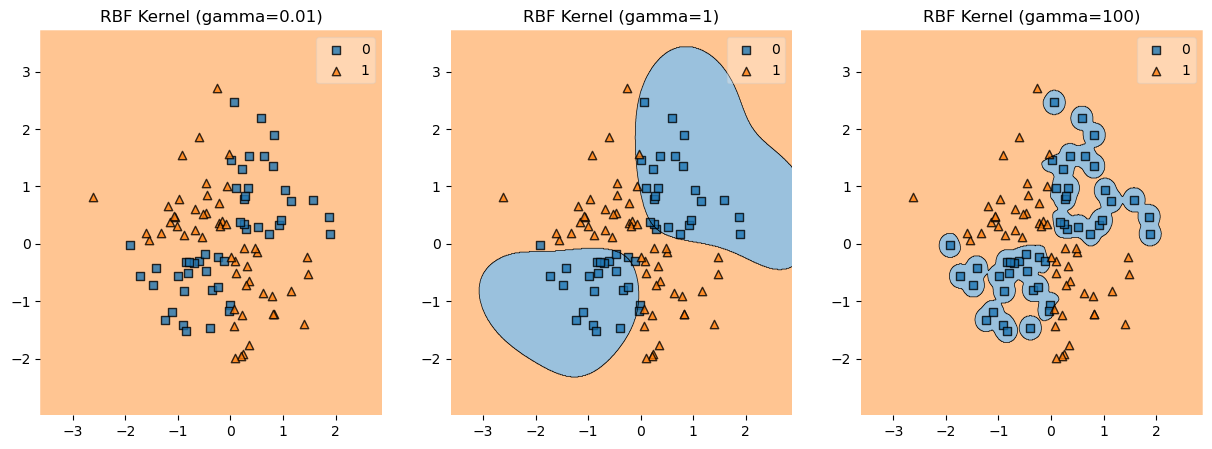

In [24]:
C = 1
gamma_values = [0.01, 1, 100]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, gamma in enumerate(gamma_values):
    model = SVC(kernel="rbf", gamma=gamma, C=C)
    model.fit(X, y)
    
    plot_decision_regions(X, y, clf=model, ax=axes[i])
    axes[i].set_title(f"RBF Kernel (gamma={gamma})")

plt.show()


#### Observations:

* Low 𝛾(0.01) → Wide decision boundary, underfits.
* Medium γ (1) → Balanced, good separation.
* High 𝛾(100) → Very sharp decision boundary, overfits.

#### 📌 4.6 Key Takeaways

✅ Linear SVM fails on non-linearly separable data.\
✅ Kernel Trick transforms data into a higher-dimensional space to make it linearly separable.\
✅ Polynomial Kernel works well for curved decision boundaries.\
✅ RBF Kernel is most commonly used and adapts to complex shapes.\
✅ The γ parameter controls how much influence each point has.



#### 4.7 OvO & OvR

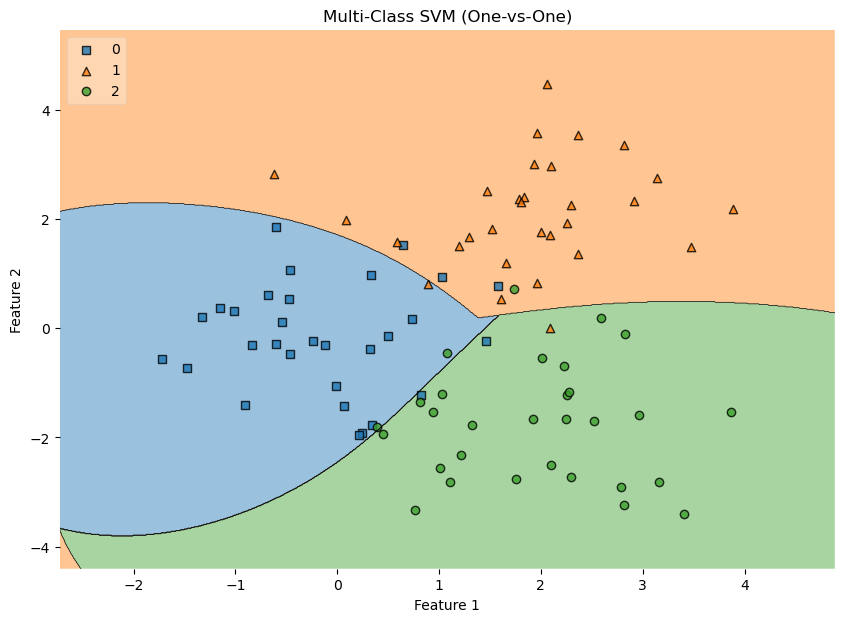

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Generate multi-class data
np.random.seed(42)
X = np.random.randn(90, 2)
y = np.array([0] * 30 + [1] * 30 + [2] * 30)

# Shift the classes
X[30:60] += 2
X[60:] += [2, -2]

# Train an SVM (One-vs-One by default)
svm_multi = SVC(kernel="rbf", C=1, decision_function_shape="ovr")
svm_multi.fit(X, y)

# Plot the decision regions
plt.figure(figsize=(10, 7))
plot_decision_regions(X, y, clf=svm_multi, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Multi-Class SVM (One-vs-One)")
plt.show()


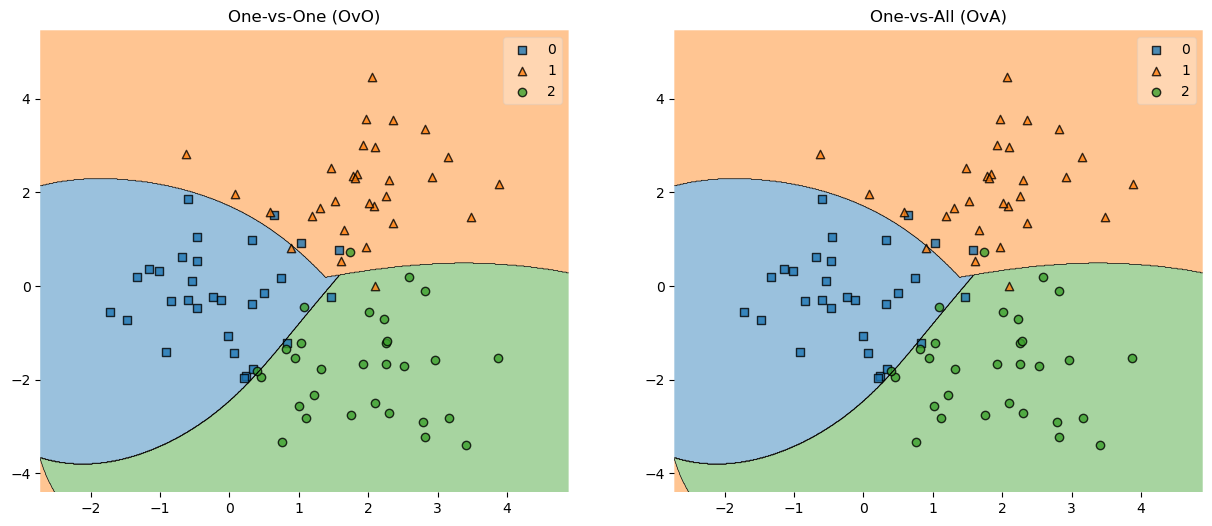

In [27]:
models = {
    "One-vs-One (OvO)": SVC(kernel="rbf", C=1, decision_function_shape="ovo"),
    "One-vs-All (OvA)": SVC(kernel="rbf", C=1, decision_function_shape="ovr")
}

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for ax, (title, model) in zip(axes, models.items()):
    model.fit(X, y)
    plot_decision_regions(X, y, clf=model, ax=ax)
    ax.set_title(title)

plt.show()


---

### 6.0: Implementing SVM from Scratch (OOP-Based) 🚀

Now, let’s build our own SVM from scratch using Object-Oriented Programming (OOP) principles.

We'll go step-by-step:

✅ Step 1: Understand the Mathematical Formulation of SVM\
✅ Step 2: Implement Hard Margin SVM (Maximal Margin Classifier)\
✅ Step 3: Implement Soft Margin SVM using Slack Variables\
✅ Step 4: Implement Kernelized SVM (Non-Linear SVM)\
✅ Step 5: Train & Test on Real Data

#### 📌 6.1 Understanding the Mathematics

##### SVM Optimization: Finding the Perfect Boundary

The goal of SVM is to **find the optimal hyperplane** that **maximizes the margin** between two classes.

##### 🔹 Hard Margin SVM (Linear, No Misclassification)

Given a dataset **(Xᵢ,yᵢ) where yᵢ ∈ {-1,1}**, we solve the **optimization problem**:

min(β,β₀) ½||β||²

subject to yᵢ(β⋅Xᵢ + β₀) ≥ 1

* **Goal:** Maximize the **margin** M = 1/||β||
* **Solution:** Solve this **Quadratic Programming (QP) problem**

##### 🔹 Soft Margin SVM (Allows Misclassification)

If data is **not linearly separable**, introduce **slack variables** ξᵢ:

min(β,β₀,ξ) ½||β||² + C∑ᵢ₌₁ⁿξᵢ

subject to yᵢ(β⋅Xᵢ + β₀) ≥ 1 - ξᵢ, ξᵢ ≥ 0

* **C Parameter:** Controls trade-off between **margin size** and **misclassification tolerance**

##### 🔹 Kernel SVM (Non-Linear)

If data is **not linearly separable**, we use the **Kernel Trick**:

K(x,x′) = φ(x)⋅φ(x′)

* Instead of **explicitly transforming** data, we compute **similarities directly** using kernels like **RBF or Polynomial**

#### 📌 6.2 Implementing Hard Margin SVM (Linear)

We use cvxopt, a Python library for solving QP problems.

In [29]:
# !pip install cvxopt

In [30]:
import numpy as np
import cvxopt

class SVM:
    def __init__(self):
        self.w = None  # Weight vector
        self.b = None  # Bias term

    def fit(self, X, y):
        """
        Trains the hard margin SVM using Quadratic Programming.
        """
        n_samples, n_features = X.shape

        # Compute the Gram matrix (X * X^T)
        K = np.dot(X, X.T)

        # Define Quadratic Programming parameters
        P = cvxopt.matrix(np.outer(y, y) * K)  # Quadratic term
        q = cvxopt.matrix(-np.ones(n_samples))  # Linear term
        A = cvxopt.matrix(y.reshape(1, -1), tc='d')  # Equality constraint
        b = cvxopt.matrix(0.0)  # Bias term
        G = cvxopt.matrix(-np.eye(n_samples))  # Inequality constraint
        h = cvxopt.matrix(np.zeros(n_samples))  # Constraint values

        # Solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution['x'])

        # Extract support vectors
        sv_indices = alphas > 1e-5
        self.alphas = alphas[sv_indices]
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]

        # Compute weight vector w
        self.w = np.sum(self.alphas[:, None] * self.support_labels[:, None] * self.support_vectors, axis=0)

        # Compute bias term b
        self.b = np.mean(self.support_labels - np.dot(self.support_vectors, self.w))

    def predict(self, X):
        """
        Predicts labels for given data points.
        """
        return np.sign(np.dot(X, self.w) + self.b)


#### 📌 6.3 Testing the Hard Margin SVM

     pcost       dcost       gap    pres   dres
 0: -8.0544e+00 -1.7875e+01  7e+01  7e+00  2e+00
 1: -3.2818e+01 -4.3645e+01  4e+01  4e+00  1e+00
 2: -2.2613e+02 -2.7166e+02  5e+01  4e+00  1e+00
 3: -7.7876e+02 -8.7378e+02  1e+02  4e+00  1e+00
 4: -2.4695e+03 -2.6999e+03  2e+02  4e+00  1e+00
 5: -4.5949e+03 -4.9921e+03  4e+02  4e+00  1e+00
 6: -4.6179e+03 -5.0170e+03  4e+02  4e+00  1e+00
 7: -2.6722e+04 -2.8149e+04  1e+03  4e+00  1e+00
 8: -6.0460e+04 -6.3481e+04  3e+03  4e+00  1e+00
 9: -6.2968e+04 -6.6109e+04  3e+03  4e+00  1e+00
10: -1.0819e+06 -1.0943e+06  1e+04  3e+00  1e+00
11: -4.7156e+07 -4.7436e+07  3e+05  3e+00  1e+00
12: -4.9254e+09 -4.9367e+09  1e+07  3e+00  1e+00
13: -1.8215e+12 -1.8221e+12  7e+08  3e+00  1e+00
14: -1.9115e+12 -1.9122e+12  7e+08  3e+00  1e+00
15: -1.9943e+12 -1.9950e+12  7e+08  3e+00  1e+00
16: -4.5025e+12 -4.5034e+12  9e+08  3e+00  1e+00
Terminated (singular KKT matrix).


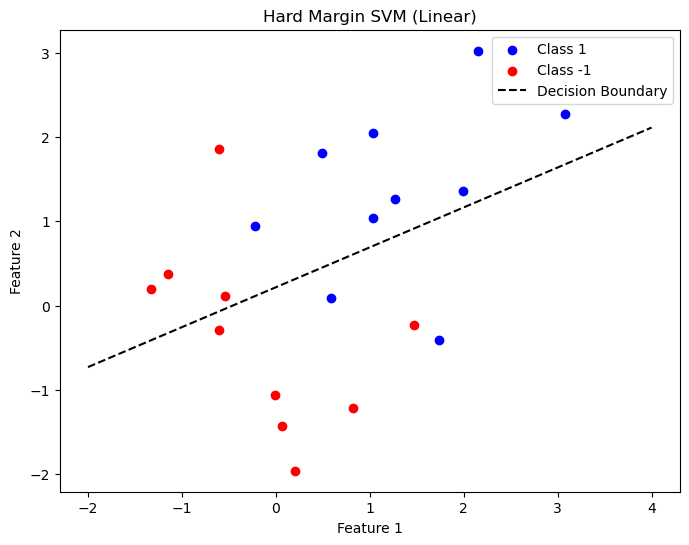

In [31]:
import matplotlib.pyplot as plt

# Generate linearly separable data
np.random.seed(42)
X = np.random.randn(20, 2)
y = np.array([1] * 10 + [-1] * 10)

# Shift one class
X[y == 1] += 1.5

# Train SVM
svm = SVM()
svm.fit(X, y)

# Predict
y_pred = svm.predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Class -1")

# Plot decision boundary
x_vals = np.linspace(-2, 4, 100)
y_vals = (-svm.b - svm.w[0] * x_vals) / svm.w[1]
plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Hard Margin SVM (Linear)")
plt.show()


#### 📌 6.4 Extending to Soft Margin SVM

In [32]:
class SoftMarginSVM(SVM):
    def __init__(self, C=1.0):
        super().__init__()
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.dot(X, X.T)

        # Modify QP parameters for Soft Margin
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones(n_samples))
        A = cvxopt.matrix(y.reshape(1, -1), tc='d')
        b = cvxopt.matrix(0.0)

        # Soft margin constraints
        G = cvxopt.matrix(np.vstack([-np.eye(n_samples), np.eye(n_samples)]))
        h = cvxopt.matrix(np.hstack([np.zeros(n_samples), np.ones(n_samples) * self.C]))

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution['x'])

        # Extract support vectors
        sv_indices = alphas > 1e-5
        self.alphas = alphas[sv_indices]
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]

        # Compute w and b
        self.w = np.sum(self.alphas[:, None] * self.support_labels[:, None] * self.support_vectors, axis=0)
        self.b = np.mean(self.support_labels - np.dot(self.support_vectors, self.w))


#### 📌 7.3 Implementing Kernel SVM

#####  Step 1: Define Kernel Functions

In [33]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

def rbf_kernel(x1, x2, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

#####  Step 2: Implement Kernel SVM (OOP)

In [34]:
import numpy as np
import cvxopt

class KernelSVM:
    def __init__(self, C=1.0, kernel=linear_kernel):
        self.C = C
        self.kernel = kernel
        self.alphas = None
        self.b = None
        self.support_vectors = None
        self.support_labels = None

    def fit(self, X, y):
        """
        Train the Kernel SVM using Quadratic Programming.
        """
        n_samples, n_features = X.shape

        # Compute Kernel matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])

        # Define Quadratic Programming parameters
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones(n_samples))
        A = cvxopt.matrix(y.reshape(1, -1), tc='d')
        b = cvxopt.matrix(0.0)
        
        # Soft margin constraints
        G = cvxopt.matrix(np.vstack([-np.eye(n_samples), np.eye(n_samples)]))
        h = cvxopt.matrix(np.hstack([np.zeros(n_samples), np.ones(n_samples) * self.C]))

        # Solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution['x'])

        # Extract support vectors
        sv_indices = alphas > 1e-5
        self.alphas = alphas[sv_indices]
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]

        # Compute bias term b
        self.b = np.mean(self.support_labels - np.sum(self.alphas[:, None] * self.support_labels[:, None] * 
                    np.array([self.kernel(self.support_vectors[i], self.support_vectors[j]) 
                              for i in range(len(self.support_vectors)) for j in range(len(self.support_vectors))]).reshape(len(self.support_vectors), len(self.support_vectors)), axis=1))

    def predict(self, X):
        """
        Predicts labels using trained Kernel SVM.
        """
        y_pred = []
        for x in X:
            prediction = np.sum(self.alphas * self.support_labels * 
                                np.array([self.kernel(sv, x) for sv in self.support_vectors])) + self.b
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)


#### 📌 7.4 Testing Kernel SVM on Non-Linear Data

Let’s generate non-linearly separable data and test our model.

     pcost       dcost       gap    pres   dres
 0: -2.1248e+01 -9.0959e+01  2e+02  1e+00  7e-16
 1: -1.9080e+01 -5.2315e+01  3e+01  7e-16  4e-16
 2: -2.2598e+01 -2.6950e+01  4e+00  2e-16  5e-16
 3: -2.4499e+01 -2.5398e+01  9e-01  1e-15  5e-16
 4: -2.4840e+01 -2.5065e+01  2e-01  2e-16  5e-16
 5: -2.4927e+01 -2.4970e+01  4e-02  2e-16  4e-16
 6: -2.4948e+01 -2.4950e+01  2e-03  6e-16  5e-16
 7: -2.4949e+01 -2.4949e+01  6e-05  1e-15  4e-16
 8: -2.4949e+01 -2.4949e+01  6e-07  8e-16  5e-16
Optimal solution found.


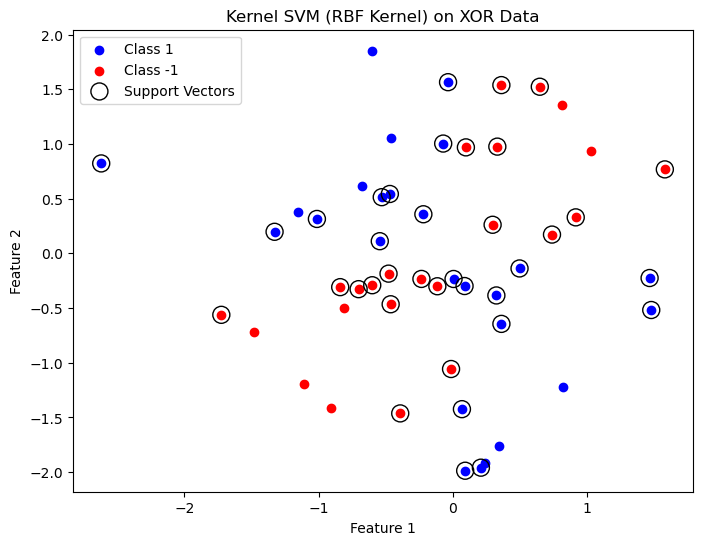

In [35]:
import matplotlib.pyplot as plt

# Generate non-linearly separable data
np.random.seed(42)
X = np.random.randn(50, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)  # XOR pattern
y[y == 0] = -1  # Convert to {-1, 1}

# Train Kernel SVM with RBF Kernel
svm_rbf = KernelSVM(C=1, kernel=rbf_kernel)
svm_rbf.fit(X, y)

# Predict
y_pred = svm_rbf.predict(X)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Class -1")

# Plot support vectors
plt.scatter(svm_rbf.support_vectors[:, 0], svm_rbf.support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Kernel SVM (RBF Kernel) on XOR Data")
plt.show()


#### 📌 7.5 Comparing Different Kernels

Let’s train Polynomial & RBF Kernels and compare results.

     pcost       dcost       gap    pres   dres
 0: -1.9835e+01 -9.0152e+01  3e+02  2e+00  9e-15
 1: -1.4642e+01 -5.4086e+01  7e+01  3e-01  6e-15
 2: -1.0083e+01 -2.5144e+01  2e+01  8e-02  5e-15
 3: -1.0505e+01 -1.2996e+01  3e+00  8e-03  2e-14
 4: -1.1260e+01 -1.1625e+01  4e-01  9e-04  7e-15
 5: -1.1375e+01 -1.1399e+01  3e-02  4e-05  2e-15
 6: -1.1385e+01 -1.1385e+01  4e-04  4e-07  2e-15
 7: -1.1385e+01 -1.1385e+01  4e-06  4e-09  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1248e+01 -9.0959e+01  2e+02  1e+00  7e-16
 1: -1.9080e+01 -5.2315e+01  3e+01  7e-16  4e-16
 2: -2.2598e+01 -2.6950e+01  4e+00  2e-16  5e-16
 3: -2.4499e+01 -2.5398e+01  9e-01  1e-15  5e-16
 4: -2.4840e+01 -2.5065e+01  2e-01  2e-16  5e-16
 5: -2.4927e+01 -2.4970e+01  4e-02  2e-16  4e-16
 6: -2.4948e+01 -2.4950e+01  2e-03  6e-16  5e-16
 7: -2.4949e+01 -2.4949e+01  6e-05  1e-15  4e-16
 8: -2.4949e+01 -2.4949e+01  6e-07  8e-16  5e-16
Optimal solution found.


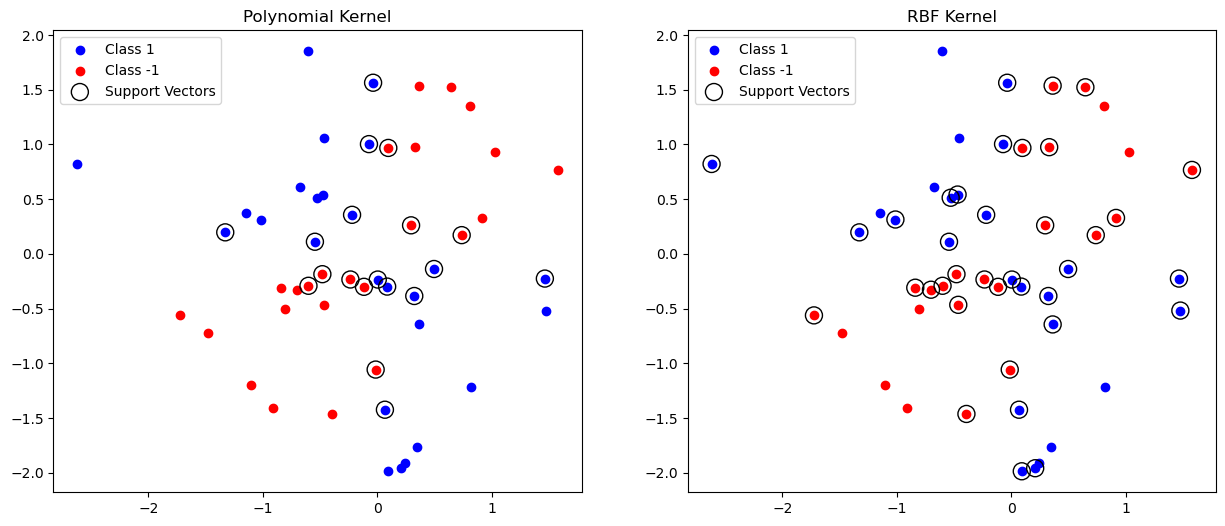

In [36]:
# Train Polynomial Kernel SVM
svm_poly = KernelSVM(C=1, kernel=lambda x, y: polynomial_kernel(x, y, degree=3))
svm_poly.fit(X, y)

# Train RBF Kernel SVM
svm_rbf = KernelSVM(C=1, kernel=lambda x, y: rbf_kernel(x, y, gamma=0.5))
svm_rbf.fit(X, y)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for ax, model, title in zip(axes, [svm_poly, svm_rbf], ["Polynomial Kernel", "RBF Kernel"]):
    y_pred = model.predict(X)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Class -1")
    ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")
    ax.set_title(title)
    ax.legend()

plt.show()

---